In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("/content/fraudTrain.csv")
test=pd.read_csv("/content/fraudTest.csv")

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27259 non-null  int64  
 1   trans_date_trans_time  27259 non-null  object 
 2   cc_num                 27259 non-null  int64  
 3   merchant               27259 non-null  object 
 4   category               27259 non-null  object 
 5   amt                    27259 non-null  float64
 6   first                  27259 non-null  object 
 7   last                   27259 non-null  object 
 8   gender                 27259 non-null  object 
 9   street                 27259 non-null  object 
 10  city                   27258 non-null  object 
 11  state                  27258 non-null  object 
 12  zip                    27258 non-null  float64
 13  lat                    27258 non-null  float64
 14  long                   27258 non-null  float64
 15  ci

In [6]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27259.00000,2.725900e+04,27259.000000,27258.000000,27258.000000,27258.000000,2.725800e+04,2.725800e+04,27258.000000,27258.000000,27258.000000
mean,13629.00000,4.203488e+17,71.834406,48732.303581,38.525900,-90.224295,9.005962e+04,1.326075e+09,38.525442,-90.225811,0.009355
std,7869.13983,1.313623e+18,151.848187,26978.693903,5.097014,13.927149,2.988129e+05,3.959763e+05,5.124933,13.946210,0.096270
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,6814.50000,1.800462e+14,9.680000,25526.000000,34.690200,-96.809400,7.540000e+02,1.325766e+09,34.785420,-96.950790,0.000000
50%,13629.00000,3.519233e+15,47.890000,48088.000000,39.339100,-87.476900,2.501000e+03,1.326043e+09,39.334418,-87.430602,0.000000
75%,20443.50000,4.651007e+15,83.600000,72042.000000,41.846700,-80.124800,2.112500e+04,1.326453e+09,41.899086,-80.148617,0.000000
max,27258.00000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326730e+09,66.659242,-66.967742,1.000000


In [7]:
train.shape

(27259, 23)

In [8]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

<Axes: >

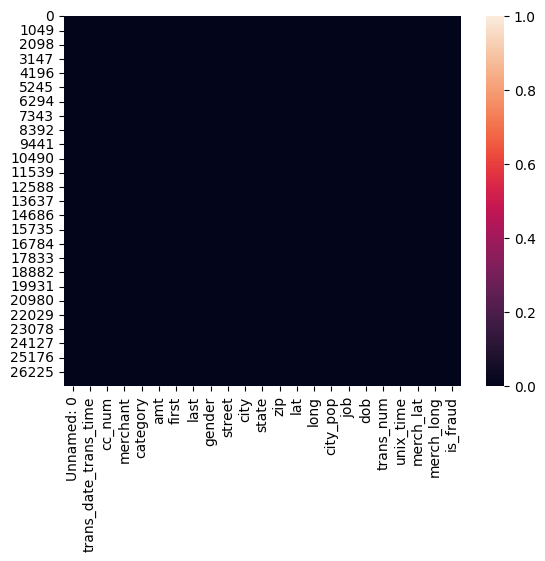

In [9]:
sns.heatmap(train.isnull())

In [10]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
    clean.dropna()
    return clean

In [11]:
cleaning_data(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27254,fraud_Bauch-Raynor,grocery_pos,311.01,F,42.4483,-95.1726,885.0,"Pilot, airline",1.326730e+09,42.088057,-95.207560,1.0
27255,fraud_Botsford and Sons,home,75.14,F,39.3036,-89.2853,3458.0,Building surveyor,1.326730e+09,38.993834,-89.709933,0.0
27256,fraud_Kozey-Kuhlman,personal_care,21.29,F,37.3304,-121.7913,973849.0,Geoscientist,1.326730e+09,37.871844,-122.029575,0.0
27257,fraud_Windler LLC,kids_pets,40.45,M,28.7724,-96.4793,911.0,Archaeologist,1.326730e+09,28.964929,-97.250660,0.0


In [12]:
cleaning_data(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27230,"fraud_Streich, Hansen and Veum",gas_transport,73.12,F,42.9207,-91.0685,878.0,Risk analyst,1.372580e+09,43.410199,-90.119977,0.0
27231,fraud_Towne LLC,misc_pos,3.69,F,36.7558,-83.1838,581.0,"Psychologist, counselling",1.372580e+09,36.418842,-83.067039,0.0
27232,fraud_Padberg-Welch,grocery_pos,84.05,F,26.3304,-81.5871,276002.0,Medical technical officer,1.372581e+09,25.873441,-81.589103,0.0
27233,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,M,29.8872,-90.0331,55581.0,Biomedical scientist,1.372581e+09,30.430342,-90.735797,0.0


In [13]:
train['gender'] = train['gender'].map({'M': 0, 'F': 1})

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    27259 non-null  object 
 1   category    27259 non-null  object 
 2   amt         27259 non-null  float64
 3   gender      27259 non-null  int64  
 4   lat         27258 non-null  float64
 5   long        27258 non-null  float64
 6   city_pop    27258 non-null  float64
 7   job         27258 non-null  object 
 8   unix_time   27258 non-null  float64
 9   merch_lat   27258 non-null  float64
 10  merch_long  27258 non-null  float64
 11  is_fraud    27258 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 2.5+ MB


In [15]:
encoder = LabelEncoder()
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [16]:
encode(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495.0,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,1,48.8878,-118.2105,149.0,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,0,42.1808,-112.2620,4154.0,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,0,46.2306,-112.1138,1939.0,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,0,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27254,29,4,311.01,1,42.4483,-95.1726,885.0,327,1.326730e+09,42.088057,-95.207560,1.0
27255,69,6,75.14,1,39.3036,-89.2853,3458.0,51,1.326730e+09,38.993834,-89.709933,0.0
27256,338,10,21.29,1,37.3304,-121.7913,973849.0,206,1.326730e+09,37.871844,-122.029575,0.0
27257,671,7,40.45,0,28.7724,-96.4793,911.0,28,1.326730e+09,28.964929,-97.250660,0.0


In [17]:
encode(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,274,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,390,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,258,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,405,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,195,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27230,605,2,73.12,0,42.9207,-91.0685,878.0,387,1.372580e+09,43.410199,-90.119977,0.0
27231,629,9,3.69,0,36.7558,-83.1838,581.0,356,1.372580e+09,36.418842,-83.067039,0.0
27232,472,4,84.05,0,26.3304,-81.5871,276002.0,280,1.372581e+09,25.873441,-81.589103,0.0
27233,442,4,74.56,1,29.8872,-90.0331,55581.0,45,1.372581e+09,30.430342,-90.735797,0.0


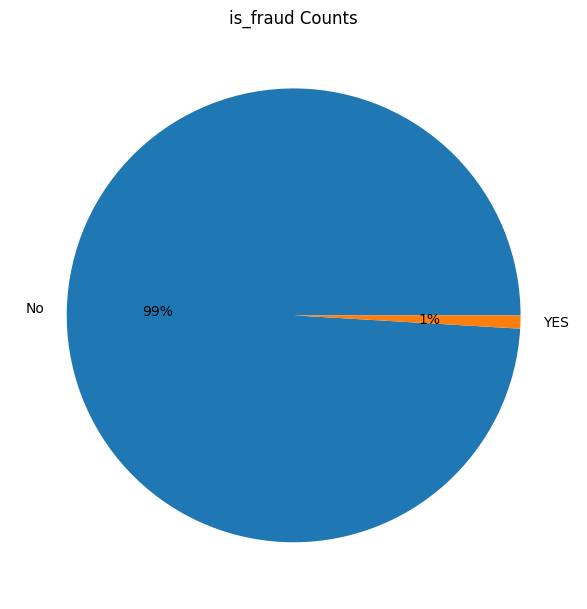

In [18]:
exit_counts = train["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [19]:
train.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.025070,-0.007274,-0.003611,0.000164,0.001544,-0.000394,-0.004060,0.007244,0.000954,0.001813,-0.006774
category,0.025070,1.000000,0.040732,0.020118,-0.001989,-0.001988,0.019308,-0.000943,0.000182,-0.001713,-0.002218,0.017276
amt,-0.007274,0.040732,1.000000,-0.003427,0.020660,0.008362,0.007571,-0.001507,0.017210,0.020542,0.008596,0.280237
gender,-0.003611,0.020118,-0.003427,1.000000,-0.052614,-0.056542,0.028838,0.078059,-0.008638,-0.052350,-0.056465,-0.004439
lat,0.000164,-0.001989,0.020660,-0.052614,1.000000,-0.024342,-0.158656,-0.023264,-0.002593,0.993603,-0.024196,0.029557
long,0.001544,-0.001988,0.008362,-0.056542,-0.024342,1.000000,-0.050489,-0.004709,0.021612,-0.024493,0.999134,0.009422
city_pop,-0.000394,0.019308,0.007571,0.028838,-0.158656,-0.050489,1.000000,-0.046404,-0.002080,-0.158450,-0.050608,0.009387
job,-0.004060,-0.000943,-0.001507,0.078059,-0.023264,-0.004709,-0.046404,1.000000,0.002824,-0.021819,-0.004780,0.021614
unix_time,0.007244,0.000182,0.017210,-0.008638,-0.002593,0.021612,-0.002080,0.002824,1.000000,-0.003149,0.020999,0.044185
merch_lat,0.000954,-0.001713,0.020542,-0.052350,0.993603,-0.024493,-0.158450,-0.021819,-0.003149,1.000000,-0.024346,0.029971


<Axes: >

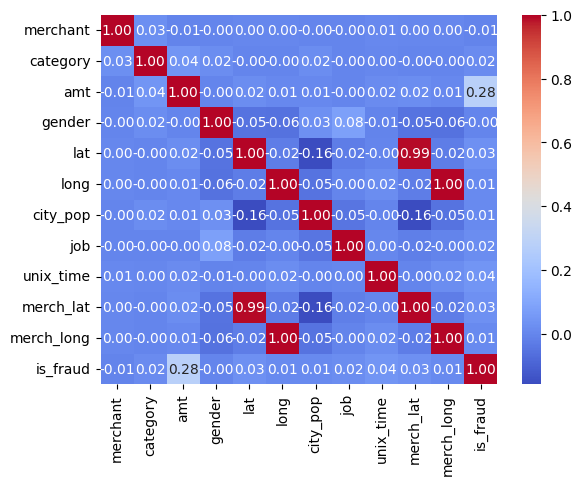

In [20]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [21]:
x = train.drop(columns=["is_fraud"], inplace = False)
y = train["is_fraud"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [24]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'DecisionTreeClassifier']
accuracies=[]

In [25]:
def cal (model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print(accuracy)

In [32]:
#LogisticRegression
cal(model1)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:
#RandomForestClassifier
cal(model2)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#DecisionTreeClassifier
cal(model3)

In [30]:
accuracies

[]

In [31]:
FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

ValueError: All arrays must be of the same length

In [ ]:
FinalResult

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [ ]:
x_test = test.drop(columns=["is_fraud"], inplace = False)
y_test = test["is_fraud"]

In [ ]:
#RandomForestClassifier
y_pred = model2.predict(x_test)
y_pred


In [33]:
accuracy = accuracy_score(test['is_fraud'],y_pred)
accuracy

NameError: name 'y_pred' is not defined